# Two-Samples Independent T-Test

In [213]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math as mt
import seaborn as sns
import statistics as st
from math import sqrt 

## The Story

In [214]:
print("You're interested in differences in Days due to Training Status. Specifically, you want to know if employees that have been trained have higher mean Days than employees that have not been trained.")

You're interested in differences in Days due to Training Status. Specifically, you want to know if employees that have been trained have higher mean Days than employees that have not been trained.


### Question

In [215]:
print("Do employees that have been trained have higher mean Days than employees that have not been trained?")

Do employees that have been trained have higher mean Days than employees that have not been trained?


### Answer

In [216]:
dt = pd.read_csv('Independent Samples t-Test Unequal Size.csv',dtype=float)

untr = dt['Untrained']
tr = dt['Trained']
tr = tr.dropna() 

#### Descriptive Statistics

In [217]:
print("Means per Category")
print("-----------------------------------------")
print(dt.columns[0],untr.mean())
print(dt.columns[1],tr.mean())

Means per Category
-----------------------------------------
Untrained 25.12
Trained 22.875


In [218]:
print("Sample Size per Category")
print("-----------------------------------------")
n1=len(untr)
n2=len(tr)
n=n1+n2
print(dt.columns[0],n1)
print(dt.columns[1],n2)

Sample Size per Category
-----------------------------------------
Untrained 50
Trained 40


In [219]:
print("Sum per Category")
print("-----------------------------------------")
print(dt.columns[0],untr.sum())
print(dt.columns[1],tr.sum())

Sum per Category
-----------------------------------------
Untrained 1256.0
Trained 915.0


In [220]:
print("Median per Category")
print("-----------------------------------------")
print(dt.columns[0],untr.median())
print(dt.columns[1],tr.median())

Median per Category
-----------------------------------------
Untrained 26.0
Trained 23.0


In [221]:
print("Min per Category")
print("-----------------------------------------")
print(dt.columns[0],untr.min())
print(dt.columns[1],tr.min())

Min per Category
-----------------------------------------
Untrained 16.0
Trained 12.0


In [222]:
print("Max per Category")
print("-----------------------------------------")
print(dt.columns[0],untr.max())
print(dt.columns[1],tr.max())

Max per Category
-----------------------------------------
Untrained 35.0
Trained 36.0


In [223]:
print("Range per Category")
print("-----------------------------------------")
np.ptp(untr)

print(dt.columns[0],np.ptp(untr))
print(dt.columns[1],np.ptp(tr))

Range per Category
-----------------------------------------
Untrained 19.0
Trained 24.0


In [224]:
print("-----------------------------------------")
print("|         Quantile per Category         |")
print("-----------------------------------------")
print("-----------------------------------------")
qa25=np.quantile(untr,0.25)
qa50=np.quantile(untr,0.5)
qa75=np.quantile(untr,0.75)

qb25=np.quantile(tr,0.25)
qb50=np.quantile(tr,0.5)
qb75=np.quantile(tr,0.75)

print(dt.columns[0],"||25th:",qa25,"||50th",qa50,"||75th",qa75,"||")
print(dt.columns[1],"  ||25th:",qb25,"||50th",qb50,"||75th",qb75,"||")

print("-----------------------------------------")
print("*Notice that 50th quantile is equal to the median*")

-----------------------------------------
|         Quantile per Category         |
-----------------------------------------
-----------------------------------------
Untrained ||25th: 21.0 ||50th 26.0 ||75th 28.0 ||
Trained   ||25th: 19.0 ||50th 23.0 ||75th 27.0 ||
-----------------------------------------
*Notice that 50th quantile is equal to the median*


In [225]:
print("-----------------------------------------")
print("|        Percentile per Category        |")
print("-----------------------------------------")
print("-----------------------------------------")
pa25=np.percentile(untr,0.25)
pa50=np.percentile(untr,0.5)
pa75=np.percentile(untr,0.75)

pb25=np.percentile(tr,0.25)
pb50=np.percentile(tr,0.5)
pb75=np.percentile(tr,0.75)

print(dt.columns[0],"||25th:",pa25,"||50th",pa50,"||75th",pa75,"||")
print(dt.columns[1],"  ||25th:",pb25," ||50th",pb50," ||75th",pb75," ||")

print("-----------------------------------------")

-----------------------------------------
|        Percentile per Category        |
-----------------------------------------
-----------------------------------------
Untrained ||25th: 16.1225 ||50th 16.245 ||75th 16.3675 ||
Trained   ||25th: 12.195  ||50th 12.39  ||75th 12.585  ||
-----------------------------------------


In [226]:
iqr1=stats.iqr(untr, axis=None, rng=(25, 75), scale=1.0, nan_policy='propagate', interpolation='linear', keepdims=False)
iqr2=stats.iqr(tr, axis=None, rng=(25, 75), scale=1.0, nan_policy='propagate', interpolation='linear', keepdims=False)
print("IQR per Category")
print("-----------------------------------------")
print("IQR -",dt.columns[0],":",iqr1)
print("IQR -",dt.columns[1],":",iqr2)
print("-----------------------------------------")
print("IQR = Q3-Q1 =",qa75,"-",qa25,"=",qa75-qa25,"For the",dt.columns[0])
print("Q3 = 75% quantile")
print("Q1 = 25% quantile")

IQR per Category
-----------------------------------------
IQR - Untrained : 7.0
IQR - Trained : 8.0
-----------------------------------------
IQR = Q3-Q1 = 28.0 - 21.0 = 7.0 For the Untrained
Q3 = 75% quantile
Q1 = 25% quantile


In [227]:
#Sum per Category^2 
print("Sum per Category")
print("-----------------------------------------")
sum1=sum(untr**2)
sum2=sum(tr**2)
#dt*dt
print(dt.columns[0],sum1)
print(dt.columns[1],sum2)

Sum per Category
-----------------------------------------
Untrained 32680.0
Trained 22117.0


In [228]:
#(Sum per Category)^2 
print("Sum per Category")
print("-----------------------------------------")
sum11=sum(untr)**2
sum22=sum(tr)**2
print(dt.columns[0],sum11)
print(dt.columns[1],sum22)

Sum per Category
-----------------------------------------
Untrained 1577536.0
Trained 837225.0


In [229]:
#Variance per Category
print("Variance per Category")
print("-----------------------------------------")
var1=np.var(untr)
var2=np.var(tr)
print(dt.columns[0],np.round(var1,2))
print(dt.columns[1],np.round(var2,2))

Variance per Category
-----------------------------------------
Untrained 22.59
Trained 29.66


In [230]:
#Standard Deviation per Category

print("Standard Deviation per Category")
print("-----------------------------------------")

sd1=np.sqrt(var1)
sd2=np.sqrt(var2)
print(dt.columns[0],np.round(sd1,2))
print(dt.columns[1],np.round(sd2,2))


Standard Deviation per Category
-----------------------------------------
Untrained 4.75
Trained 5.45


#### Graphs

[Text(0.5, 0, 'Gender'), Text(0, 0.5, 'Values')]

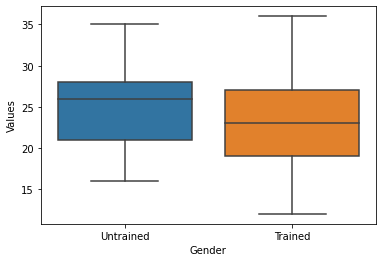

In [231]:
# Boxplot
sns.boxplot(x='variable', y='value', data=pd.melt(dt)).set(
            xlabel='Gender', #define the variable's nature
            ylabel='Values')


#### Testing Hypothesis

In [258]:
alpha =0.05
testresult=stats.ttest_ind(untr, tr, axis=0, 
                      equal_var=True, nan_policy='propagate', 
                      permutations=None, random_state=None, 
                      alternative='two-sided', trim=0)
print('===============================')
print("Test Hypothesis")
print()
print("H0:",untr.mean(),"=",tr.mean())
print("H1:",untr.mean(),"=/=",tr.mean())
print('===============================')
print("Independent Samples Test")
print("Equal Variances Assumed")
print('===============================')
N1=(len(tr)-1)
N2=(len(untr)-1)
df = N1+N2
meandif=untr.mean()-tr.mean()
meandif=np.round(meandif,2)

pooled_standard_deviation = sqrt(((n1 - 1)*std1 * std1 +(n2-1)*std2 * std2) /(n1 + n2-2))
SE = pooled_standard_deviation*sqrt((1/n1)+(1/n2))

#find t critical value
tctiticall=stats.t.ppf(q=alpha,df=df)
tctiticalr=stats.t.ppf(q=1-alpha,df=df)
tctitical2=stats.t.ppf(q=1-(alpha/2),df=df)


print("Mean Difference = ",meandif)
print("df = ",df)
print("Pooled Standard Deviation = ", np.round(pooled_standard_deviation,4))
print("Pooled Standard Error = ", np.round(SE,4))
print('===============================')
print("t-Critical Value")
print()
print("Left-Tailed Test = ", np.round(tctiticall,4))
print("Right-Tailed Test = ", np.round(tctiticalr,4))
print("2-Tailed Test = ", "±",np.round(tctitical2,4))
print('===============================')
print("t(",df,") = ",np.round(testresult[0],4))
print("p-value = ",np.round(testresult[1],4))

ind_t_test = stats.ttest_ind(tr, untr)

std1=tr.std()
std1
std2=untr.std()
std2


std_N1N2 = sqrt((((N1 - 1)*(std1)**2 + (N2 - 1)*(std2)**2) / df))
std_N1N2 



from scipy.stats import t
MoE = t.ppf(0.975, df) * std_N1N2 * sqrt(1/N1 + 1/N2)
MoE

print()
print(100*(1-alpha),'% CI for the Mean Difference')
LB=meandif - MoE 
LB=np.round(LB,2)
UB=meandif + MoE
UB=np.round(UB,2)

print("[",LB,",", UB,"]")

print()
print("Type I Error = ",alpha)

#calculate beta
taf=(untr.mean()-tr.mean())/sqrt((((std1**2)/n1)+((std2**2)/n2)))
beta=1-t.cdf(taf, df=df)
beta=np.round(beta,4)
print("Type II Error =",beta)
print("There is a", beta*100,"% chance of failing to detect the difference if the real mean difference is 0")
power=1-beta
print("Power =",power)
print("The probability that the test correctly rejects the null hypothesis when the alternative hypothesis is true is",np.round(power*100,4),"%")

Test Hypothesis

H0: 25.12 = 22.875
H1: 25.12 =/= 22.875
Independent Samples Test
Equal Variances Assumed
Mean Difference =  2.25
df =  88
Pooled Standard Deviation =  5.2108
Pooled Standard Error =  1.1054
t-Critical Value

Left-Tailed Test =  -1.6624
Right-Tailed Test =  1.6624
2-Tailed Test =  ± 1.9873
t( 88 ) =  2.0631
p-value =  0.0421

95.0 % CI for the Mean Difference
[ 0.09 , 4.41 ]

Type I Error =  0.05
Type II Error = 0.021
There is a 2.1 % chance of failing to detect the difference if the real mean difference is 0
Power = 0.979
The probability that the test correctly rejects the null hypothesis when the alternative hypothesis is true is 97.9 %


In [260]:
if n1 == n2 :
    cohensd = (meandif/pooled_standard_deviation)
    cohensd = np.round(cohensd,6)
    print("Cohen's d =",cohensd)
else :
    if n > 50 :
        g = meandif/std_N1N2
        g = np.round(g,6)
        print("Hedge's g =",g)
        print("No bias correction")
        if g<0.2 :
            print("Small Effect")
            pr="Small"
        elif g<0.5 :
            print("Medium Effect")
            pr="Medium"
        elif g<0.8 :
            print("Large Effect")
            pr="Large"
        else :
            print("Very Large Effect")
            pr=" Very Large"

    else :
    #Bias correction
        g1 = (meandif/std_N1N2)*((n-3)/(n-2.25))*(sqrt((n-2)/n))
        print("Hedge's g =",g1)
        if g1<0.2 :
            print("Small Effect")
            pr="Small"          
        elif g1<0.5 :
            print("Medium Effect")
            pr="Medium"          
        elif g1<0.8 :
            print("Large Effect")
            pr="Large"            
        else :
            print("Very Large Effect")
            pr=" Very Large"            

Hedge's g = 0.443772
No bias correction
Medium Effect


#### Results

In [259]:
print("-----------------------------------------")
print(": Results :")
if(testresult[1] < alpha ):
    print("-----------------------------------------")
    print("Reject the null hypothesis")
    print("Accept the alternative.") 
    print("The difference is statistically significant.") 
    print("The mean Days from employees that have been trained is lower than or equal to \nthe mean Days from employees that have not been trained.")
    print("On average, the Days variable was ",np.round(cohensd,2),"higher for employees that have been trained.")
    print("The difference in Days due to Training Status was",pr,".")
    print("H0:",tr.mean(),"=",untr.mean())    
    print("-----------------------------------------")
    print("p-Value =",np.round((testresult[1]),4), "<" , alpha , "= α")
    print("-----------------------------------------")
else:
    print("-----------------------------------------")
    print("Reject the null hypothesis")
    print("Remain the null.") 
    print("The difference is statistically NOT significant.") 
    print("The mean Days from employees that have been trained is hight than or equal to the mean Days from employees that have not been trained.")
    print("On average, the Days variable was ",np.round(cohensd,2),"higher for employees that have been trained.")
    print("The difference in Days due to Training Status was",pr,".")
    print("H0:",tr.mean(),"=",untr.mean())    
    print("-----------------------------------------")
    print("p-Value =",np.round((testresult[1]),4), "<" , alpha , "= α")
    print("-----------------------------------------")

-----------------------------------------
: Results :
-----------------------------------------
Reject the null hypothesis
Accept the alternative.
The difference is statistically significant.
The mean Days from employees that have been trained is lower than or equal to 
the mean Days from employees that have not been trained.
On average, the Days variable was  0.43 higher for employees that have been trained.
The difference in Days due to Training Status was Medium .
H0: 22.875 = 25.12
-----------------------------------------
p-Value = 0.0421 < 0.05 = α
-----------------------------------------
